In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [2]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
encoder= LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
X=df.drop(["class"],axis=1)
y=df["class"]

In [7]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [8]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

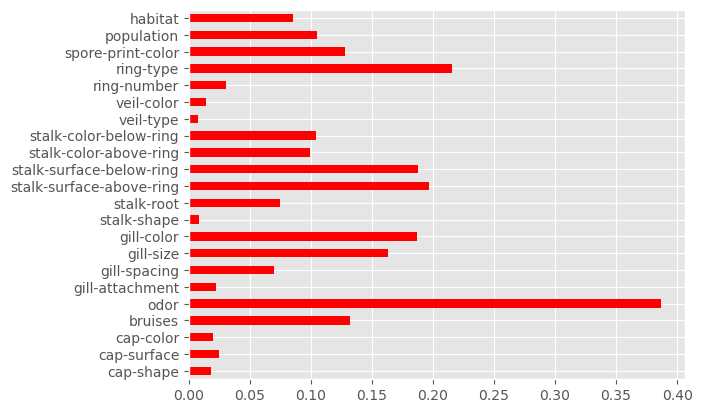

In [9]:
from sklearn.feature_selection import mutual_info_classif
plt.style.use("ggplot")
importance= mutual_info_classif(X,y)
feature_impo=pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh",color="red")
plt.show()

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
pipelines={
          "KNeighbors":Pipeline([("scaler",StandardScaler()), ("classifier",KNeighborsClassifier())]),
          "DecisionTree":Pipeline([("classifier",DecisionTreeClassifier())]),
          "LgisticRegression":Pipeline([("scaler",StandardScaler()), ("classifier",LogisticRegression())]),
}
for name,pipeline in pipelines.items():
    scores= cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
    print(f"{name}: mean Accuracy={scores.mean()}, Standard Deviation= {scores.std()}")

KNeighbors: mean Accuracy=0.8765035240621447, Standard Deviation= 0.15384572841019578
DecisionTree: mean Accuracy=0.9202115953012505, Standard Deviation= 0.11042769967082854
LgisticRegression: mean Accuracy=0.8335552103069345, Standard Deviation= 0.15156878079860286


In [12]:
tree = DecisionTreeClassifier()
tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [13]:
pred=tree.predict(xtest)
pred

array([0, 1, 1, ..., 1, 0, 0])

In [14]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<Axes: >

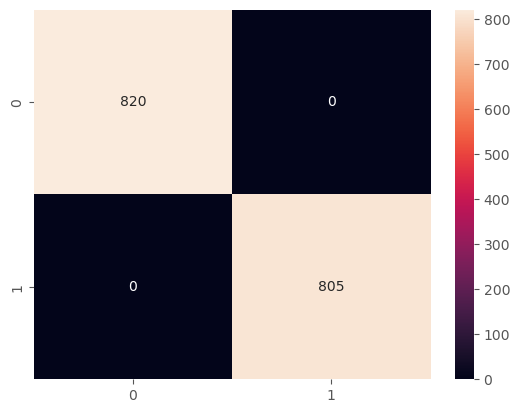

In [15]:
cm= confusion_matrix(ytest,pred)
sns.heatmap(cm,annot=True,fmt="0.5g")

In [18]:
logreg=LogisticRegression(solver="newton-cg")
logreg.fit(xtrain,ytrain)

LogisticRegression(solver='newton-cg')

In [19]:
pred1=logreg.predict(xtest)
pred1

array([0, 0, 1, ..., 1, 0, 0])

In [20]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       820
           1       0.96      0.93      0.95       805

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



<Axes: >

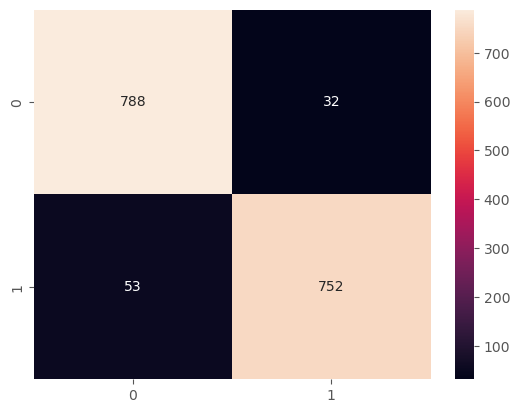

In [21]:
cm= confusion_matrix(ytest,pred1)
sns.heatmap(cm,annot=True,fmt="0.5g")

In [16]:
neighbor = KNeighborsClassifier(n_neighbors=3)
neighbor.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [22]:
xtest=np.ascontiguousarray(xtest)

In [23]:
pred2=neighbor.predict(xtest)
pred2

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 1, ..., 1, 0, 0])

In [25]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<Axes: >

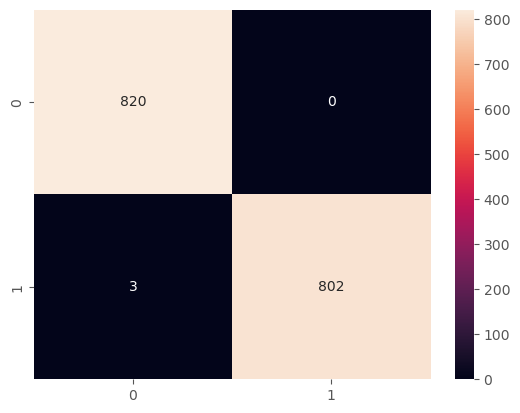

In [26]:
cm= confusion_matrix(ytest,pred2)
sns.heatmap(cm,annot=True,fmt="0.5g")

## this test shows that "DecisionTreeClassifier" has 100% accuracy followed by KNeighborsClassifier
## they are recommended model for this test 